# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

584

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#base_url = "http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="
#query_url = base_url + city

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"#"metric"
# set up lists to hold reponse info
cloudiness = []
city_new =[]
country  = []
date = []
humidity = []
lat=[]
lan=[]
speed=[]
maxtemp=[]

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print("Beginning Data Retrieval")    
print("-----------------------------")  
i=1
j=1
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lan.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        speed.append(response['wind']['speed'])
        
        print("Processing Record "+str(i) + " of Set " + str(j) +" | " + city)
        city_new.append(city)
        
        i=i+1 
        if i == 50 :
            i=0
            j = j+1
    except KeyError:
        print("City not found. Skipping...")
print("-----------------------------")    
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | cabo san lucas
Processing Record 2 of Set 1 | port lincoln
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | bengkulu
Processing Record 5 of Set 1 | kruisfontein
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | kiama
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | laem sing
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | evensk
Processing Record 17 of Set 1 | mae ramat
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | dejen
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | borogontsy
Processing Record 23 of Set 1 | tulghes
Processing Record 24 of Se

Processing Record 36 of Set 4 | ridgecrest
Processing Record 37 of Set 4 | katherine
Processing Record 38 of Set 4 | navashino
Processing Record 39 of Set 4 | saint-joseph
Processing Record 40 of Set 4 | husavik
Processing Record 41 of Set 4 | qaanaaq
City not found. Skipping...
Processing Record 42 of Set 4 | lubango
Processing Record 43 of Set 4 | nanakuli
Processing Record 44 of Set 4 | camacha
Processing Record 45 of Set 4 | sorland
Processing Record 46 of Set 4 | kroya
Processing Record 47 of Set 4 | alofi
Processing Record 48 of Set 4 | port hawkesbury
Processing Record 49 of Set 4 | riyadh
Processing Record 0 of Set 5 | mbini
Processing Record 1 of Set 5 | puxinana
Processing Record 2 of Set 5 | haines junction
Processing Record 3 of Set 5 | vadso
Processing Record 4 of Set 5 | longyearbyen
Processing Record 5 of Set 5 | walvis bay
City not found. Skipping...
Processing Record 6 of Set 5 | arlit
Processing Record 7 of Set 5 | prince rupert
Processing Record 8 of Set 5 | dingzhou

Processing Record 21 of Set 8 | santa cruz de tenerife
Processing Record 22 of Set 8 | filadelfia
Processing Record 23 of Set 8 | tautira
Processing Record 24 of Set 8 | ures
City not found. Skipping...
Processing Record 25 of Set 8 | bethel
Processing Record 26 of Set 8 | omsukchan
Processing Record 27 of Set 8 | flin flon
Processing Record 28 of Set 8 | nanortalik
Processing Record 29 of Set 8 | asau
Processing Record 30 of Set 8 | aksarka
Processing Record 31 of Set 8 | xunchang
Processing Record 32 of Set 8 | urucui
Processing Record 33 of Set 8 | waingapu
Processing Record 34 of Set 8 | neuquen
Processing Record 35 of Set 8 | excelsior springs
Processing Record 36 of Set 8 | qandala
Processing Record 37 of Set 8 | khilok
Processing Record 38 of Set 8 | misratah
Processing Record 39 of Set 8 | maraa
Processing Record 40 of Set 8 | lamar
Processing Record 41 of Set 8 | puli
Processing Record 42 of Set 8 | marsa matruh
Processing Record 43 of Set 8 | launceston
City not found. Skippi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": city_new,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lan,
    "Max Temp":maxtemp,
    "Wind Speed":speed    
}
weather_data_df = pd.DataFrame(weather_dict)


weather_data_df.count()

City          528
Cloudiness    528
Country       528
Date          528
Humidity      528
Lat           528
Lng           528
Max Temp      528
Wind Speed    528
dtype: int64

In [6]:
#Export the city data into a .csv.
weather_data_df.to_csv("../"+ output_data_file, index=False, header=True)

In [7]:
#Display the DataFrame
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cabo san lucas,5,MX,1580236120,60,22.89,-109.91,79.00,8.05
1,port lincoln,0,AU,1580236120,77,-34.73,135.87,65.84,5.46
2,lebu,95,CL,1580236120,54,-37.62,-73.65,67.55,11.79
3,bengkulu,100,ID,1580235920,90,-3.80,102.27,76.12,4.14
4,kruisfontein,0,ZA,1580235908,69,-34.00,24.73,62.96,9.35


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

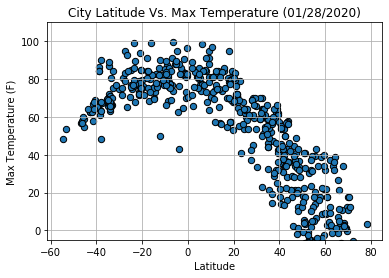

In [8]:
# chart1 Latitude vs. Temperature Plot
date=time.strftime("%m/%d/%Y")

chart1= weather_data_df.plot(kind="scatter",x="Lat",y="Max Temp",grid=True,marker='o',s=40,edgecolors="black", linewidth=1)
chart1.set_xlabel("Latitude")
chart1.set_ylim(-5,110)
chart1.set_ylabel("Max Temperature (F)")
chart1.set_title("City Latitude Vs. Max Temperature (" +date + ")")
plt.savefig("../output_data/LatvsTempplot.png")

In [9]:
#In the above plot(Latitude Vs Max Temp) observed  that moving to north is more colder than moving towards south.

#### Latitude vs. Humidity Plot

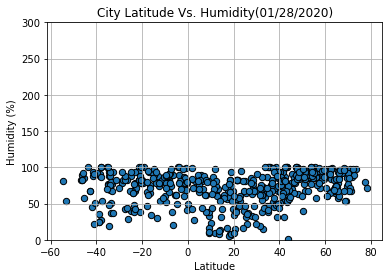

In [10]:
# chart2 Latitude vs. Humidity Plot

chart2= weather_data_df.plot(kind="scatter",x="Lat",y="Humidity",grid=True,marker='o',s=40,edgecolors="black", linewidth=1)
chart2.set_xlabel("Latitude")
chart2.set_ylabel("Humidity (%)")
chart2.set_ylim(0,300)
chart2.set_title("City Latitude Vs. Humidity(" + date + ")")
plt.savefig("../output_data/LatvsHumplot.png")

In [11]:
#In the above plot(Latitude Vs Humidity) for most of cities the humidity %  range did not differ with latitude

#### Latitude vs. Cloudiness Plot

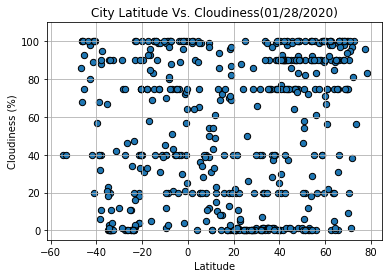

In [12]:
#chart3 Latitude vs. Cloudiness Plot
chart3= weather_data_df.plot(kind="scatter",x="Lat",y="Cloudiness",grid=True,marker='o',
                             s=40,edgecolors="black", linewidth=1)
chart3.set_xlabel("Latitude")
chart3.set_ylabel("Cloudiness (%)")
chart3.set_ylim(-5,110)
chart3.set_title("City Latitude Vs. Cloudiness(" + date + ")")
plt.savefig("../output_data/LatvsClouplot.png")

In [13]:
#In the above plot(Latitude Vs Cloudiness) the cloudiness in cities do not have a significant relationship with latitude

#### Latitude vs. Wind Speed Plot

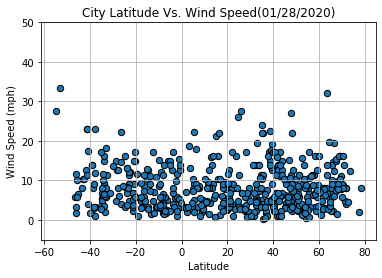

In [14]:
# chart4 Latitude vs. Wind Speed Plot

chart4= weather_data_df.plot(kind="scatter",x="Lat",y="Wind Speed",grid=True,marker='o',s=40,edgecolors="black",
                             linewidth=1)
chart4.set_xlabel("Latitude")
chart4.set_ylabel("Wind Speed (mph)")
chart4.set_ylim(-5,50)
chart4.set_title("City Latitude Vs. Wind Speed(" + date + ")")

plt.savefig("../output_data/LatvsWindspeedplot.png")

In [15]:
#In the above plot(Latitude Vs windspeed) most of cities the windspeed is between 0 to 20 mph,
# with a non significant increase towards north pole.

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression_plot(x_value,y_value,pole,x_axis_title,y_axis_title,title,x_cor,y_cor):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot scatter plot
    plt.scatter(x_value,y_value)

# Plot regression line
    plt.plot(x_value,regress_values,"r-")
    plt.annotate(line_eq,(x_cor,y_cor),fontsize=15,color="red")

# Label plot
    plt.xlabel(x_axis_title)
    plt.ylabel(y_axis_title)
    plt.title(title,fontsize=14, fontweight="bold")

# Print r square value
    print(f"The r-squared is: {rvalue}")
    output_file = "../output_data/" + pole + x_axis_title + "Vs" + y_axis_title + "_le.png"
    plt.savefig(output_file)

# Show plot
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data_df.loc[weather_data_df["Lat"] >= 0]
southern_df = weather_data_df.loc[weather_data_df["Lat"] < 0]
northern_df.head(10)
#southern_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cabo san lucas,5,MX,1580236120,60,22.89,-109.91,79.00,8.05
5,hilo,40,US,1580235873,68,19.73,-155.09,68.00,2.57
7,tiksi,97,RU,1580236121,87,71.69,128.87,-23.21,4.18
10,cherskiy,100,RU,1580235934,97,68.75,161.30,-22.32,10.16
12,laem sing,15,TH,1580236122,63,12.48,102.07,82.99,4.23
13,albany,90,US,1580236122,55,42.60,-73.97,37.40,11.41
15,evensk,98,RU,1580236123,93,61.95,159.23,12.13,2.91
16,mae ramat,0,TH,1580236123,56,16.98,98.52,54.64,1.36
17,barrow,1,US,1580236123,67,71.29,-156.79,-27.40,4.70
18,dejen,31,ET,1580236123,23,10.17,38.13,70.72,4.21


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8873804098532432


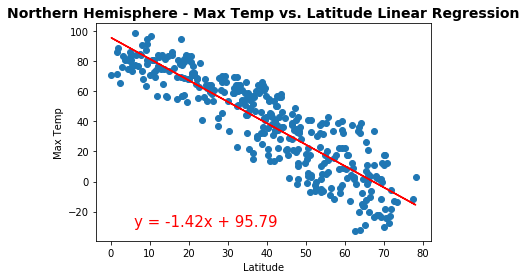

In [18]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_value = northern_df.iloc[:,5]
y_value = northern_df.iloc[:, 7]

linear_regression_plot(x_value,y_value,"north","Latitude","Max Temp",
                       "Northern Hemisphere - Max Temp vs. Latitude Linear Regression",6,-30)

In [19]:
#In above plot temparature is maximum closer to equator and decrease when moving towards north

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5296413256272563


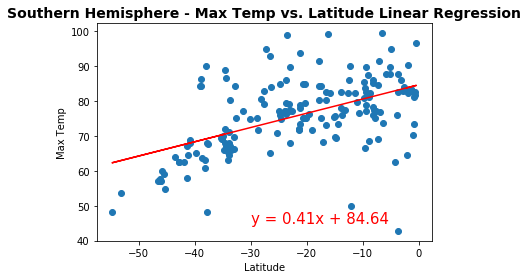

In [20]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression

x_value = southern_df.iloc[:,5]
y_value = southern_df.iloc[:, 7]

linear_regression_plot(x_value,y_value,"south",
                       "Latitude","Max Temp","Southern Hemisphere - Max Temp vs. Latitude Linear Regression",-30,45)

In [21]:
#In above plot temparature is maximum closer to equator and shows a trend to decrease when moving towards south

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.45715193106495317


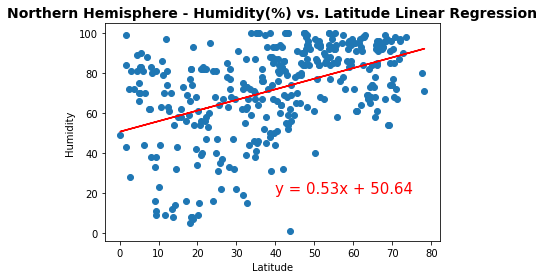

In [22]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_value = northern_df.iloc[:,5]
y_value = northern_df.iloc[:, 4]

linear_regression_plot(x_value,y_value,"north","Latitude","Humidity",
                       "Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression",40,20)


In [23]:
# The correlation between Latitude and Humidity shows North side has more humidity

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10339796477359642


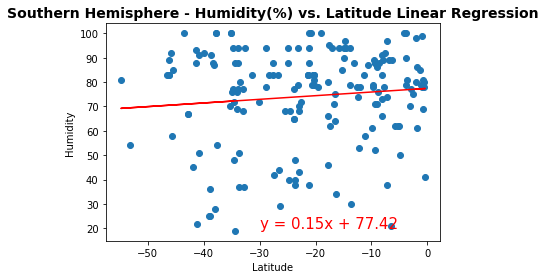

In [24]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_value = southern_df.iloc[:,5]
y_value = southern_df.iloc[:, 4]

linear_regression_plot(x_value,y_value,"south","Latitude","Humidity",
                       "Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression",-30,20)


In [25]:
# The correlation between Latitude and Humidity shows a poor correlation

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.34030451329650807


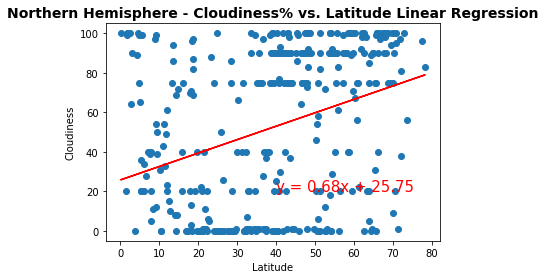

In [26]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_value = northern_df.iloc[:,5]
y_value= northern_df.iloc[:,1]

linear_regression_plot(x_value,y_value,"north","Latitude","Cloudiness",
                       "Northern Hemisphere - Cloudiness% vs. Latitude Linear Regression",40,20)

In [27]:
#The above correlations shows that the Cloudinessdont depend on Latitude

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1533639382760093


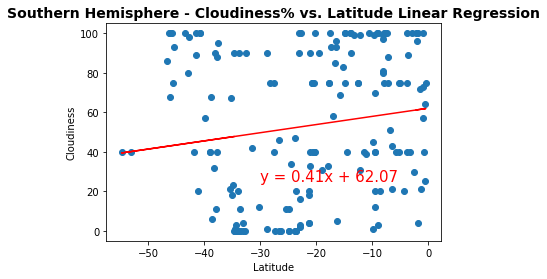

In [28]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_value = southern_df.iloc[:,5]
y_value = southern_df.iloc[:,1]

linear_regression_plot(x_value,y_value,"south","Latitude","Cloudiness",
                       "Southern Hemisphere - Cloudiness% vs. Latitude Linear Regression",-30,25)

In [29]:
#The above correlations shows that the Cloudinessdont depend on Latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08924952171388872


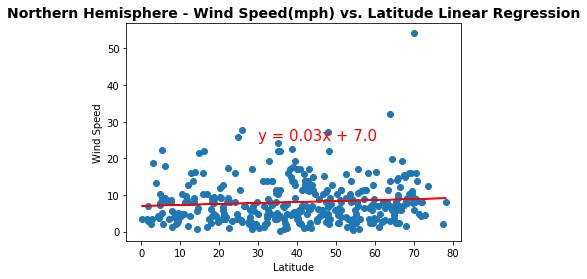

In [30]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_value = northern_df.iloc[:,5]
y_value = northern_df.iloc[:,8]

linear_regression_plot(x_value,y_value,"north","Latitude","Wind Speed",
                       "Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression",30,25)

In [31]:
#The maximum wind speed is observed closer to equator and has poor the correlation with Latitude

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2598298506507144


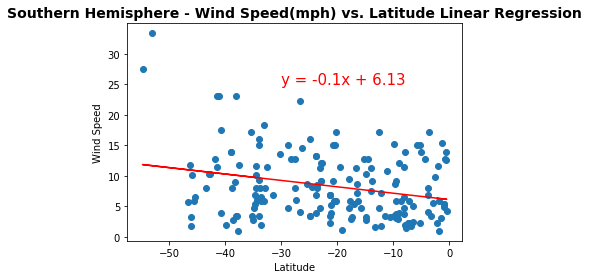

In [32]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_value = southern_df.iloc[:,5]
y_value = southern_df.iloc[:,8]

linear_regression_plot(x_value,y_value,"south","Latitude","Wind Speed",
                       "Southern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression",-30,25)

In [33]:
#The maximum wind speed is observed closer to equator and has poor the correlation with Latitude